<a href="https://colab.research.google.com/github/amannitjsr/Data-Analysis-using-python/blob/main/data_cleaning_datetime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/drive/MyDrive/machine learning/covid_19_india.csv')

In [3]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
import datetime as dt
df['month']=df['Date'].dt.month
df['year']=df['Date'].dt.year

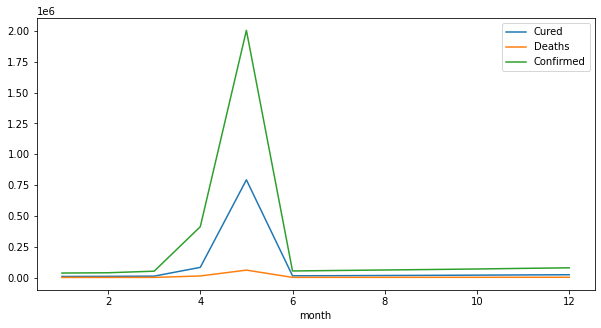

In [5]:
df.groupby(['month'])[['Cured','Deaths','Confirmed']].sum().plot(kind = 'line',figsize = (10,5))

In [6]:
df.groupby(['month'])[['Cured','Deaths','Confirmed']].mean().reset_index()

,month,Cured,Deaths,Confirmed
0,1,141.676923,18.353846,566.353846
1,2,123.256098,15.500000,479.085366
2,3,24.907368,3.305263,109.374737
3,4,127.067381,20.131700,631.448698
4,5,1219.413846,93.215385,3083.367692
5,6,207.214286,25.785714,767.228571
6,7,214.013699,26.123288,791.479452
7,8,232.246575,27.876712,844.630137
8,9,238.025974,27.922078,851.636364
9,10,258.142857,30.064935,905.987013


In [7]:
dff= pd.read_csv('https://raw.githubusercontent.com/Jcharis/DataScienceTools/master/Data_analysis_of_Coronavirus_Outbreak_with_Python/coronavirus_data_clean.csv')

In [8]:
dff.head()

,Unnamed: 0,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry
0,0,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0,POINT (117.2264 31.8257)
1,1,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0,POINT (116.4142 40.1824)
2,2,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0,POINT (107.874 30.0572)
3,3,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0,POINT (117.9874 26.0789)
4,4,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0,POINT (103.8343 36.0611)


In [9]:
df.columns.str.replace(r'\n','', regex=True)

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed', 'month', 'year'],
      dtype='object')

In [10]:
dff.drop('Unnamed: 0',axis = 1,inplace = True)

In [11]:
dff.rename(columns={'Province/State':'Province_State','Country/Region':'Country_Region'},inplace=True)

In [12]:
new_df = dff['Country_Region'].str.split(' ',n=1,expand = True) #n=1 used here to split in 2 column only

In [13]:
new_df.rename(columns={0:'state',1:'country'},inplace = True)

In [14]:
dff=dff.join(new_df)

In [15]:
dff.drop('Country_Region',axis=1,inplace = True)

In [16]:
dff.head()                      

,Province_State,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry,state,country
0,Anhui,31.8257,117.2264,1/22/20,1,0,0,POINT (117.2264 31.8257),Mainland,China
1,Beijing,40.1824,116.4142,1/22/20,14,0,0,POINT (116.4142 40.1824),Mainland,China
2,Chongqing,30.0572,107.8740,1/22/20,6,0,0,POINT (107.874 30.0572),Mainland,China
3,Fujian,26.0789,117.9874,1/22/20,1,0,0,POINT (117.9874 26.0789),Mainland,China
4,Gansu,36.0611,103.8343,1/22/20,0,0,0,POINT (103.8343 36.0611),Mainland,China


In [17]:
df_per_day = dff.groupby('Date')['Confirmed','Deaths', 'Recovered'].max()

<ipython-input-17-6774f3dadd21>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_per_day = dff.groupby('Date')['Confirmed','Deaths', 'Recovered'].max()


In [18]:
df_per_day.head()

,Confirmed,Deaths,Recovered
Date,,,
1/22/20,444,17,28
1/23/20,444,17,28
1/24/20,549,24,31
1/25/20,761,40,32
1/26/20,1058,52,42


In [19]:
df_per_day['Confirmed'].idxmax()

'2/27/20'

In [20]:
df_per_day['Confirmed'].max()

65596

In [21]:
dff.groupby('country')['Confirmed','Deaths', 'Recovered'].sum().reset_index()

<ipython-input-21-281607af7cd5>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dff.groupby('country')['Confirmed','Deaths', 'Recovered'].sum().reset_index()


,country,Confirmed,Deaths,Recovered
0,Arab Emirates,240,0,54
1,China,1511357,41646,302015
2,Kong,1419,33,129
3,Korea,6677,54,234
4,Lanka,32,0,20
5,Macedonia,2,0,0
6,Marino,1,0,0


<ipython-input-22-ca8421730b91>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dff.groupby('country')['Confirmed','Deaths', 'Recovered'].sum().reset_index().plot(kind='line')


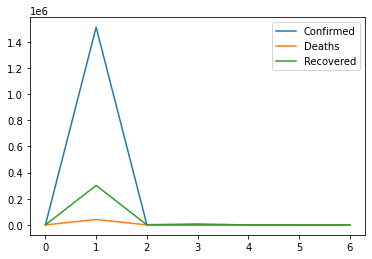

In [22]:
dff.groupby('country')['Confirmed','Deaths', 'Recovered'].sum().reset_index().plot(kind='line')

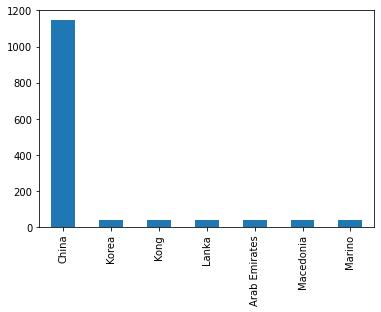

In [23]:
dff['country'].value_counts().plot(kind='bar')

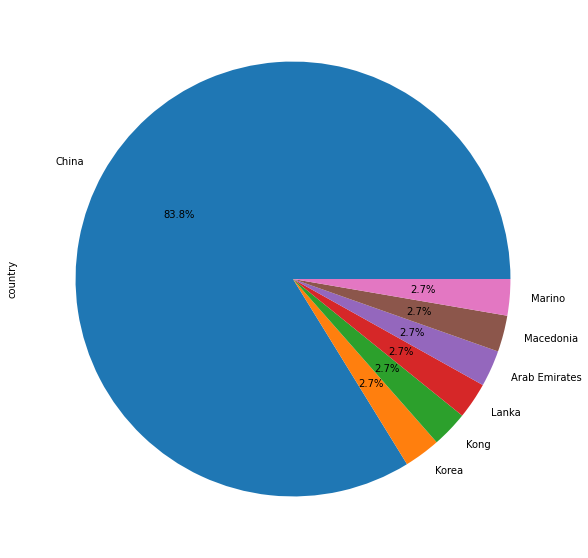

In [24]:
# Load Data Viz Packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(20,10))
dff['country'].value_counts().plot.pie(autopct="%1.1f%%")

In [25]:
#top 10 find 
dff['state'].value_counts().nlargest(10)

Mainland     1147
US            629
Australia     185
Canada        111
Estonia        37
Austria        37
Iran           37
Lebanon        37
Iraq           37
Oman           37
Name: state, dtype: int64

In [26]:
dff['state'].value_counts().unique()

array([1147,  629,  185,  111,   37])

In [27]:
new_df1 = dff[dff['state'].duplicated()==False]

In [28]:
new_df1.head()

,Province_State,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry,state,country
0,Anhui,31.8257,117.2264,1/22/20,1,0,0,POINT (117.2264 31.8257),Mainland,China
31,NaN,15.0000,101.0000,1/22/20,2,0,0,POINT (101 15),Thailand,None
32,NaN,36.0000,138.0000,1/22/20,2,0,0,POINT (138 36),Japan,None
33,NaN,36.0000,128.0000,1/22/20,1,0,0,POINT (128 36),South,Korea
34,Taiwan,23.7000,121.0000,1/22/20,1,0,0,POINT (121 23.7),Taiwan,None


In [29]:
dff.isnull().sum()

Province_State    1665
Lat                  0
Long                 0
Date                 0
Confirmed            0
Deaths               0
Recovered            0
geometry             0
state                0
country           2516
dtype: int64

In [30]:
dff.shape

(3885, 10)

In [31]:
dff['Province_State'].fillna('Missing',inplace =True)

In [32]:
dff['country'].fillna('Missing',inplace =True)

In [33]:
dff['Province_State'].unique()

array(['Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong',
       'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan',
       'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu', 'Jiangxi', 'Jilin',
       'Liaoning', 'Ningxia', 'Qinghai', 'Shaanxi', 'Shandong',
       'Shanghai', 'Shanxi', 'Sichuan', 'Tianjin', 'Tibet', 'Xinjiang',
       'Yunnan', 'Zhejiang', 'Missing', 'Taiwan', 'Seattle, WA',
       'Chicago, IL', 'Tempe, AZ', 'Macau', 'Hong Kong', 'Toronto, ON',
       'British Columbia', 'Orange, CA', 'Los Angeles, CA',
       'New South Wales', 'Victoria', 'Queensland', 'London, ON',
       'Santa Clara, CA', 'South Australia', 'Boston, MA',
       'San Benito, CA', 'Madison, WI', 'Diamond Princess cruise ship',
       'San Diego County, CA', 'San Antonio, TX',
       'Omaha, NE (From Diamond Princess)',
       'Travis, CA (From Diamond Princess)', 'From Diamond Princess',
       'Lackland, TX (From Diamond Princess)', 'Humboldt County, CA',
       'Sacrament

In [34]:
df_ebola =pd.read_csv('https://raw.githubusercontent.com/Jcharis/DataScienceTools/master/Data_analysis_of_Coronavirus_Outbreak_with_Python/dataset/pandemic_ebola_dataset.csv')

In [35]:
df_sars =pd.read_csv('https://raw.githubusercontent.com/Jcharis/DataScienceTools/master/Data_analysis_of_Coronavirus_Outbreak_with_Python/dataset/pandemic_sars_dataset.csv')

In [45]:
df_ebola.head()

,Country_Region,Date,Confirmed,Deaths,Lat,Long
0,Guinea,2014-08-29,482.0,287.0,9.945600,-9.696600
1,Nigeria,2014-08-29,15.0,6.0,9.082000,8.675300
2,Sierra Leone,2014-08-29,935.0,380.0,8.460555,-11.779889
3,Liberia,2014-08-29,322.0,225.0,6.428100,-9.429500
4,Sierra Leone,2014-09-05,1146.0,443.0,8.460555,-11.779889


In [37]:
df_ebola.rename(columns={'Country/Region':'Country_Region'},inplace=True)

In [38]:
df_ebola['Date'] = pd.to_datetime(df_ebola['Date'])

In [39]:
df_sars['Date'] = pd.to_datetime(df_sars['Date'])

In [40]:
df_sars.rename(columns={'Country/Region':'Country_Region'},inplace=True)

In [41]:
df_sars.head()

,Date,Country_Region,Confirmed,Deaths,Recovered,Lat,Long
0,2003-03-17,Germany,1,0,0,51.0000,9.0000
1,2003-03-17,Canada,8,2,0,64.2823,-135.0000
2,2003-03-17,Singapore,20,0,0,1.2833,103.8333
3,2003-03-17,Hong Kong,95,1,0,NaN,NaN
4,2003-03-17,Switzerland,2,0,0,46.8182,8.2275


In [42]:
df_sars['Date'].dt.year

0       2003
1       2003
2       2003
3       2003
4       2003
        ... 
2533    2003
2534    2003
2535    2003
2536    2003
2537    2003
Name: Date, Length: 2538, dtype: int64

In [43]:
#convert datetime to weekday name 
df_ebola['Date'].dt.strftime('%A')

0          Friday
1          Friday
2          Friday
3          Friday
4          Friday
          ...    
2480    Wednesday
2481    Wednesday
2482    Wednesday
2483    Wednesday
2484    Wednesday
Name: Date, Length: 2485, dtype: object

In [44]:
df_sars.groupby('Country_Region')['Confirmed', 'Deaths', 'Recovered'].sum().sort_values(by=['Confirmed', 'Deaths', 'Recovered'],ascending=False).reset_index()

<ipython-input-44-103782cddfe8>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_sars.groupby('Country_Region')['Confirmed', 'Deaths', 'Recovered'].sum().sort_values(by=['Confirmed', 'Deaths', 'Recovered'],ascending=False).reset_index()


,Country_Region,Confirmed,Deaths,Recovered
0,China,343157,19738,216353
1,Hong Kong,132776,16924,80211
2,Taiwan*,30373,3550,14367
3,Singapore,16428,2052,11206
4,Canada,14249,2015,8752
5,US,7206,0,2245
6,Vietnam,5885,438,4116
7,Germany,725,0,586
8,Philippines,702,127,509
9,Thailand,697,167,428
